In [129]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [130]:
from google.colab import files
uploaded = files.upload()

Saving AVAX-USD.csv to AVAX-USD.csv


In [131]:
import io
df = pd.read_csv("AVAX-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,4.613968,4.915115,4.481499,4.896294,4.896294,28340.0
2020-07-14,4.909865,5.229564,4.762068,4.986754,4.986754,3957.0
2020-07-15,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-16,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-01-01,10.903734,10.929948,10.670733,10.865915,10.865915,95741904.0
2023-01-02,10.866034,11.231228,10.743951,11.153615,11.153615,128530323.0
2023-01-03,11.153684,11.528151,11.087236,11.384450,11.384450,165410541.0


Text(0, 0.5, 'ETH-USD Açılış Fiyatları')

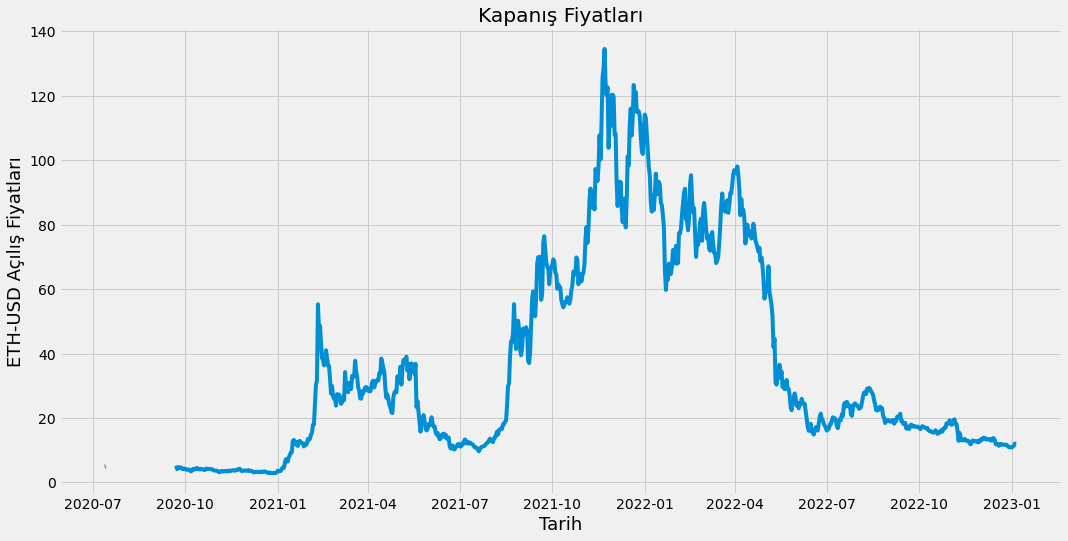

In [132]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('ETH-USD Açılış Fiyatları', fontsize=18)


In [133]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

726

In [134]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.51197333e-02],
       [1.58069894e-02],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],


In [135]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01511973, 0.01580699,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])]
[nan]

[array([0.01511973, 0.01580699,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        n

In [136]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [137]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(666, 60, 1)


In [138]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [139]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [140]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
666/666 [==============================] - 22s 28ms/step - loss: nan
Epoch 2/5
666/666 [==============================] - 19s 28ms/step - loss: nan
Epoch 3/5
666/666 [==============================] - 20s 30ms/step - loss: nan
Epoch 4/5
666/666 [==============================] - 18s 27ms/step - loss: nan
Epoch 5/5
666/666 [==============================] - 19s 29ms/step - loss: nan


In [141]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [142]:
x_test = np.array(x_test)

In [143]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [144]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 25ms/step


In [145]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

nan

<ipython-input-146-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


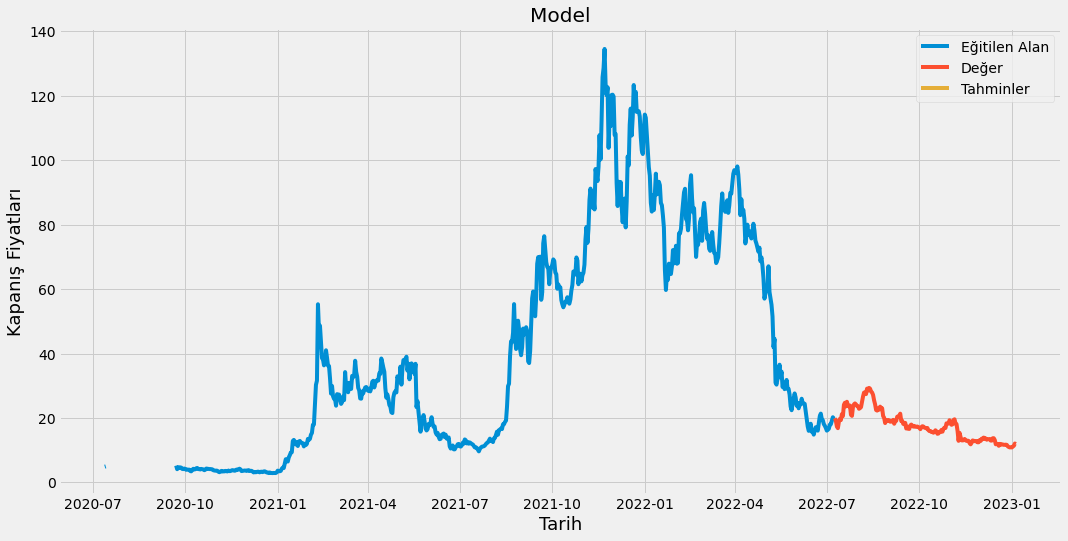

                Close  Tahminler
Date                            
2022-07-09  19.918478        NaN
2022-07-10  19.152054        NaN
2022-07-11  17.374582        NaN
2022-07-12  16.845411        NaN
2022-07-13  18.809504        NaN
...               ...        ...
2023-01-01  10.865915        NaN
2023-01-02  11.153615        NaN
2023-01-03  11.384450        NaN
2023-01-04  12.077613        NaN
2023-01-05  11.932262        NaN

[181 rows x 2 columns]


In [146]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)